# compressive strength model using ANN

In [5]:
import numpy as np
import pandas as pd


Loading the dataset

In [6]:
import numpy as np
import pandas as pd
print(np.__version__, pd.__version__)


1.26.4 2.2.3


In [7]:
import openpyxl
import pandas as pd

# Test reading an Excel file
dataset = pd.read_excel("D:/machine learning/ann model/DATA3.xlsx")
print(dataset.head())
dataset.shape


   Sr.no  Cement Grade  Cement content  Water  Water/Binder  Fine  Aggregate  \
0      1          52.0           335.0  166.3      0.437632            768.1   
1      2          52.4           300.0  146.2      0.423768            719.1   
2      3          52.0           290.0  146.8      0.438209            748.5   
3      4          52.4           290.0  146.2      0.423768            719.1   
4      5          52.0           300.0  146.8      0.438209            748.5   

   Course Aggregate  Fly Ash  Silica fume  Blast furnace slag  Plasticizer  \
0             945.6     45.0          0.0                 0.0          2.4   
1            1004.7     45.0          0.0                 0.0          3.0   
2            1004.7     45.0          0.0                 0.0          2.8   
3            1004.7     55.0          0.0                 0.0          2.8   
4            1004.7     35.0          0.0                 0.0          2.8   

   Super Plastercizer  Compressive strength    Aut

(3205, 15)

In [8]:
import pandas as pd

nan_columns = dataset.columns[dataset.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

# List of columns to drop
columns_to_drop = ['Sr.no', 'Cement Grade', 'Water','Author', 'DOI link','Super Plastercizer']

# Check if columns exist in the dataframe before dropping
columns_to_drop = [col for col in columns_to_drop if col in dataset.columns]
dataset = dataset.drop(columns=columns_to_drop)

dataset

Columns with NaN values: ['Cement Grade', 'Water', 'Author', 'DOI link']


,Cement content,Water/Binder,Fine Aggregate,Course Aggregate,Fly Ash,Silica fume,Blast furnace slag,Plasticizer,Compressive strength
0,335.0,0.437632,768.1,945.6,45.0,0.0,0.0,2.4,73.000
1,300.0,0.423768,719.1,1004.7,45.0,0.0,0.0,3.0,72.900
2,290.0,0.438209,748.5,1004.7,45.0,0.0,0.0,2.8,71.000
3,290.0,0.423768,719.1,1004.7,55.0,0.0,0.0,2.8,71.000
4,300.0,0.438209,748.5,1004.7,35.0,0.0,0.0,2.8,70.800
...,...,...,...,...,...,...,...,...,...
3200,360.0,0.500000,745.0,950.0,0.0,0.0,0.0,0.0,49.375
3201,360.0,0.500000,745.0,950.0,0.0,0.0,0.0,0.0,49.375
3202,320.0,0.562500,731.0,950.0,0.0,0.0,0.0,0.0,46.875
3203,320.0,0.562500,731.0,950.0,0.0,0.0,0.0,0.0,46.875


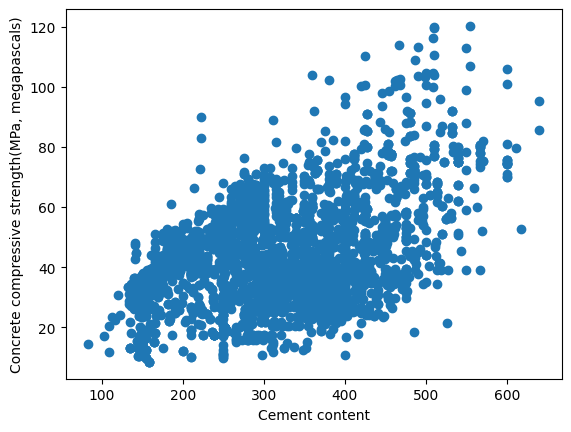

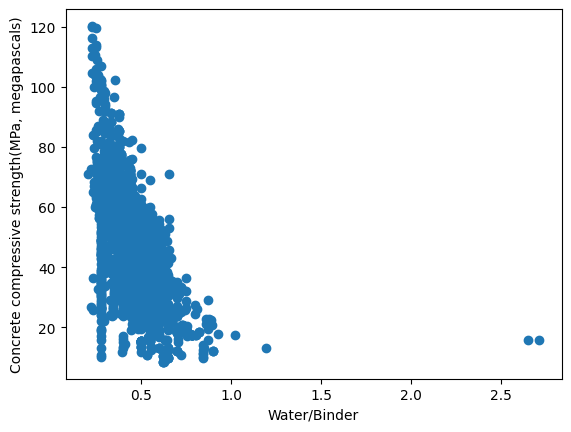

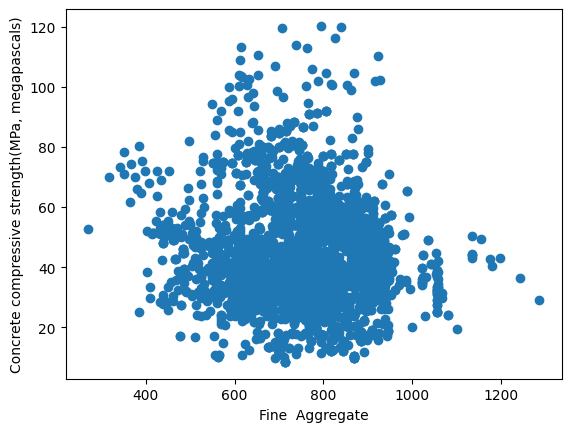

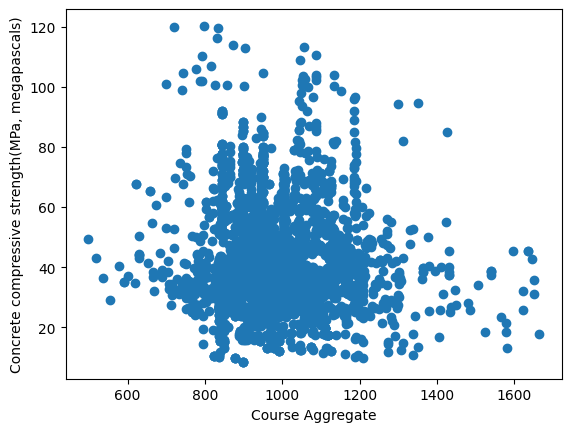

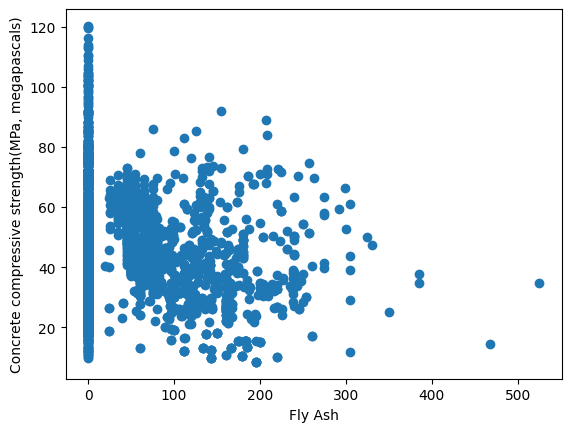

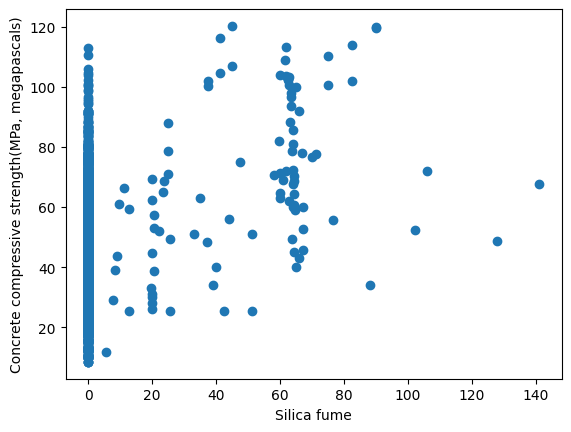

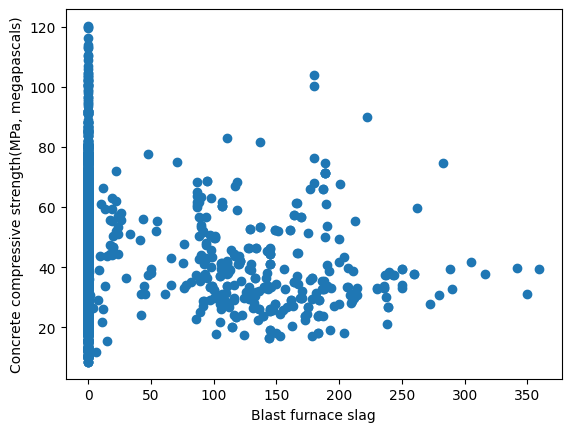

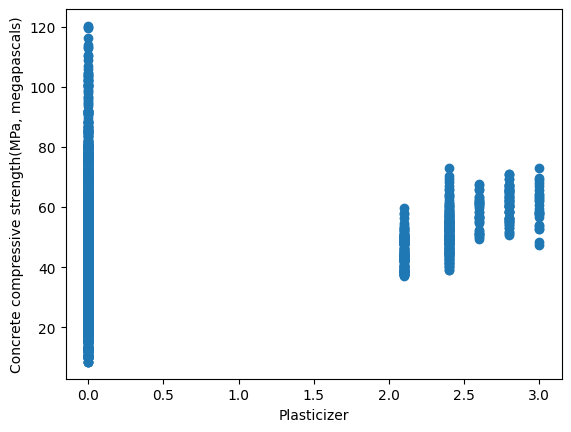

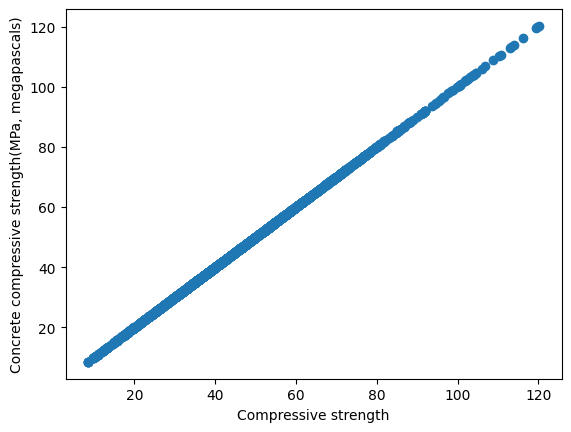

In [9]:
import matplotlib.pyplot as plt

for feature in dataset.columns:
    plt.scatter(dataset[feature], dataset.iloc[:, -1])
    plt.xlabel(feature)
    plt.ylabel('Concrete compressive strength(MPa, megapascals)')
    plt.show()

In [10]:
import numpy as np
import pandas as pd
from scipy import stats

# Define columns to exclude from outlier removal
exclude_cols = ['Fly Ash', 'Silica fume', 'Blast furnace slag', 'Compressive strength','Cement Grade','Water']

# Function to find outliers beyond 3 standard deviations
def find_outliers(col):
    if col.name in exclude_cols:  # Skip outlier detection for excluded columns
        return pd.Series(False, index=col.index)  # Keep all values in excluded columns
    
    z = np.abs(stats.zscore(col))  # Compute Z-score
    idx_outliers = z > 3.5  # Mark values beyond 3 std deviations as outliers
    return pd.Series(idx_outliers, index=col.index)

# Apply the function to all columns
df_outliers = dataset.copy()
for col in dataset.describe().columns:
    df_outliers[col] = find_outliers(dataset[col])

# Identify rows with any outliers in the selected columns
test_outs = df_outliers.apply(lambda x: np.any(x), axis=1)

# Remove outlier rows
dataset_clean = dataset.loc[test_outs == False]

# Display dataset summary
print(dataset_clean.describe())

# Overwrite original dataset with cleaned data
dataset = dataset_clean

dataset.shape

       Cement content  Water/Binder  Fine  Aggregate  Course Aggregate  \
count     3171.000000   3171.000000      3171.000000       3171.000000   
mean       322.424368      0.470827       769.510050        975.884693   
std        103.229039      0.110753       125.156734        119.724662   
min         83.000000      0.204611       342.400000        578.000000   
25%        250.000000      0.400000       696.800000        899.000000   
50%        320.000000      0.467758       780.000000        955.450000   
75%        397.000000      0.547837       863.800000       1045.100000   
max        640.000000      0.900000      1180.000000       1435.500000   

           Fly Ash  Silica fume  Blast furnace slag  Plasticizer  \
count  3171.000000  3171.000000         3171.000000  3171.000000   
mean     43.231867     1.587874           15.160278     0.311479   
std      65.241548    10.006170           47.831586     0.816823   
min       0.000000     0.000000            0.000000     0.000

(3171, 9)

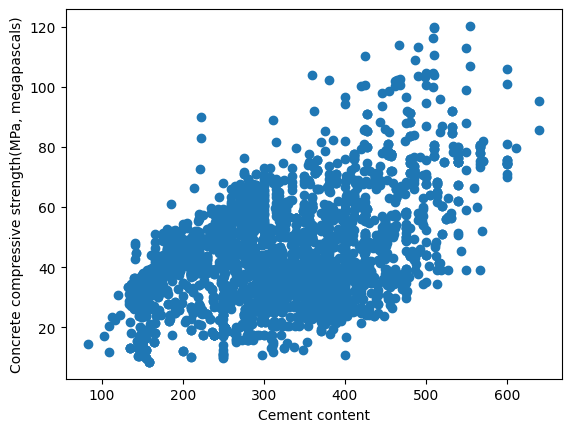

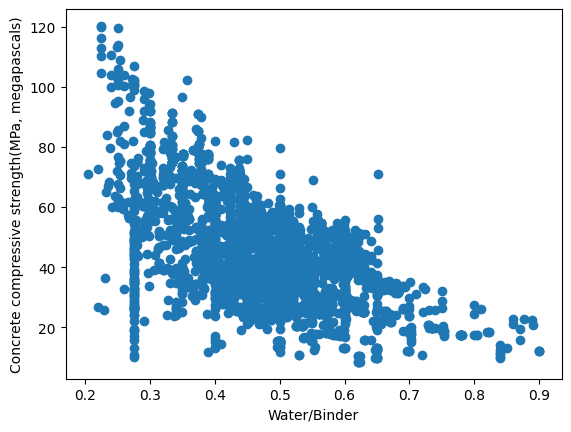

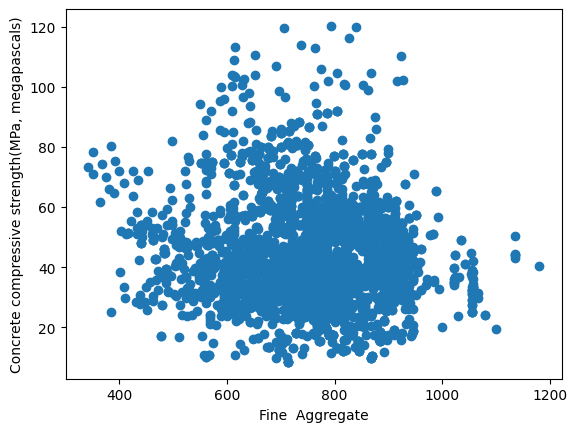

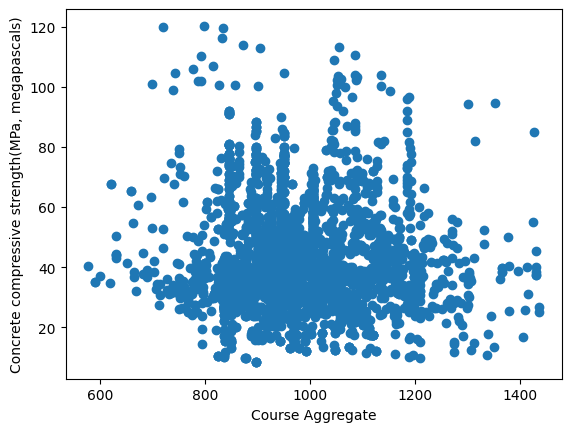

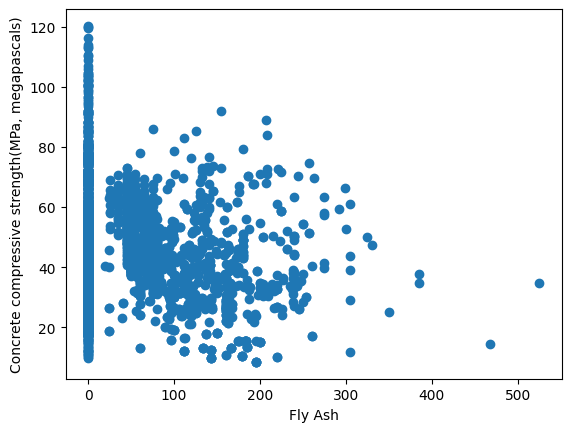

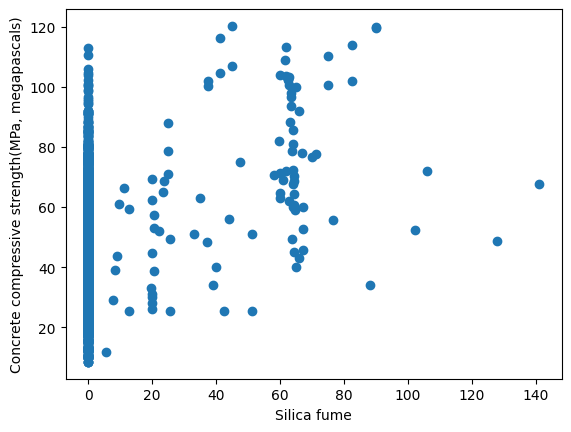

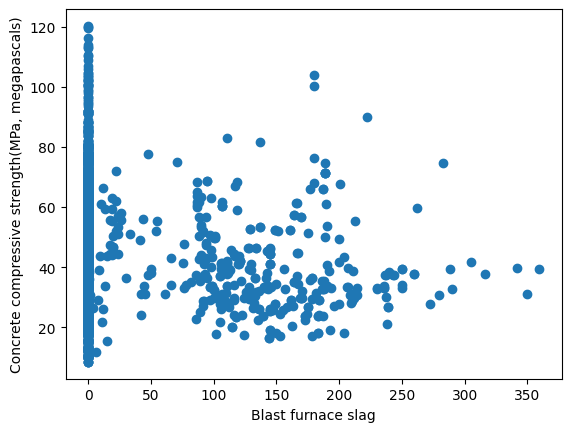

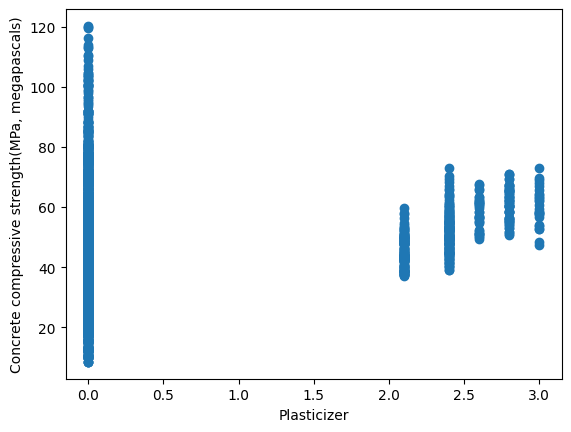

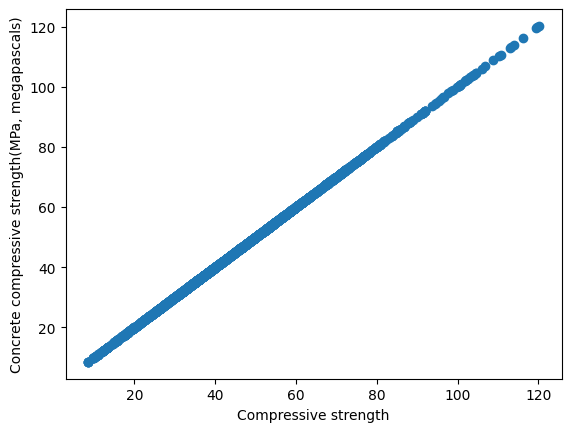

In [11]:
for feature in dataset.columns:

    plt.scatter(dataset[feature],dataset.iloc[:, -1 ])
    plt.xlabel(feature)
    plt.ylabel('Concrete compressive strength(MPa, megapascals)')
    plt.show()

separation of dataset as X and y

In [40]:
print(dataset.columns)
y=dataset['Compressive strength']
X=dataset.drop(['Compressive strength'], axis=1)
# X = np.nan_to_num(X, nan=0.0)  # Replace NaN with 
X

Index(['Cement content', 'Water/Binder', 'Fine  Aggregate', 'Course Aggregate',
       'Fly Ash', 'Silica fume', 'Blast furnace slag', 'Plasticizer',
       'Compressive strength'],
      dtype='object')


,Cement content,Water/Binder,Fine Aggregate,Course Aggregate,Fly Ash,Silica fume,Blast furnace slag,Plasticizer
0,335.0,0.437632,768.1,945.6,45.0,0.0,0.0,2.4
1,300.0,0.423768,719.1,1004.7,45.0,0.0,0.0,3.0
2,290.0,0.438209,748.5,1004.7,45.0,0.0,0.0,2.8
3,290.0,0.423768,719.1,1004.7,55.0,0.0,0.0,2.8
4,300.0,0.438209,748.5,1004.7,35.0,0.0,0.0,2.8
...,...,...,...,...,...,...,...,...
3200,360.0,0.500000,745.0,950.0,0.0,0.0,0.0,0.0
3201,360.0,0.500000,745.0,950.0,0.0,0.0,0.0,0.0
3202,320.0,0.562500,731.0,950.0,0.0,0.0,0.0,0.0
3203,320.0,0.562500,731.0,950.0,0.0,0.0,0.0,0.0


Splitting the data for testing and training

In [62]:
import sklearn as sk
print(sk.__version__)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

1.6.1
(2853, 8) (318, 8) (2853,) (318,)


Standardizing The dataset

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

Creating the architecture of our Deep learning model

In [ ]:
# from keras.initializers import HeNormal

# model = Sequential()

# model.add(Dense(1000, activation='relu', kernel_initializer=HeNormal(), input_shape=(X_train.shape[1],)))
# model.add(Dense(1000, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(1000, activation='relu', kernel_initializer=HeNormal()))
# # model.add(Dense(1000, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(700, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(700, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(700, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(400, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(400, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(400, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(32, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(10, activation='relu', kernel_initializer=HeNormal()))
# model.add(Dense(1, activation='linear'))

In [ ]:
model=Sequential()

model.add(Dense(1024, activation='leaky_relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1792, activation='leaky_relu'))  # units_1
model.add(Dense(1664, activation='leaky_relu'))  # units_2
model.add(Dense(512, activation='leaky_relu'))   # units_3
model.add(Dense(1152, activation='leaky_relu'))  # units_4
model.add(Dense(384, activation='leaky_relu'))   # units_5
model.add(Dense(128, activation='leaky_relu'))   # units_6
model.add(Dense(1664, activation='leaky_relu'))  # units_7
model.add(Dense(1408, activation='leaky_relu'))  # units_8
model.add(Dense(384, activation='leaky_relu'))   # units_9
model.add(Dense(896, activation='leaky_relu'))   # units_10
model.add(Dense(1152, activation='leaky_relu'))  # units_11
model.add(Dense(256, activation='leaky_relu'))   # units_12

# 🔹 Output Layer for Regression
model.add(Dense(1, activation='linear'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              9216      
                                                                 
 dense_1 (Dense)             (None, 1792)              1836800   
                                                                 
 dense_2 (Dense)             (None, 1664)              2983552   
                                                                 
 dense_3 (Dense)             (None, 512)               852480    
                                                                 
 dense_4 (Dense)             (None, 1152)              590976    
                                                                 
 dense_5 (Dense)             (None, 384)               442752    
                                                                 
 dense_6 (Dense)             (None, 128)               4

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00035226),  # Best learning rate
    loss='mean_squared_error',  # MSE for regression
    metrics=['mae']
)

# 🔹 Train the Model and Store History
history = model.fit(X_train, y_train, epochs=180, validation_split=0.2, batch_size=32)

Epoch 1/180
72/72 [==============================] - 6s 23ms/step - loss: 697.8488 - mae: 20.1233 - val_loss: 191.0391 - val_mae: 10.7786
Epoch 2/180
72/72 [==============================] - 1s 16ms/step - loss: 191.1126 - mae: 10.7465 - val_loss: 201.0816 - val_mae: 11.4941
Epoch 3/180
72/72 [==============================] - 1s 14ms/step - loss: 149.9255 - mae: 9.4476 - val_loss: 235.2877 - val_mae: 11.8668
Epoch 4/180
72/72 [==============================] - 1s 14ms/step - loss: 155.0557 - mae: 9.6273 - val_loss: 134.7724 - val_mae: 8.8106
Epoch 5/180
72/72 [==============================] - 1s 15ms/step - loss: 126.4038 - mae: 8.5257 - val_loss: 203.1674 - val_mae: 11.4394
Epoch 6/180
72/72 [==============================] - 1s 15ms/step - loss: 115.9584 - mae: 8.1005 - val_loss: 100.4591 - val_mae: 7.2279
Epoch 7/180
72/72 [==============================] - 1s 15ms/step - loss: 102.1749 - mae: 7.5294 - val_loss: 100.8997 - val_mae: 7.4480
Epoch 8/180
72/72 [=======================

In [ ]:
y_pred=model.predict(X_test)
ytrain_pred= model.predict(X_train) 

90/90 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
r2_score(y_train,ytrain_pred)

0.863943287451296


0.9201756670448009

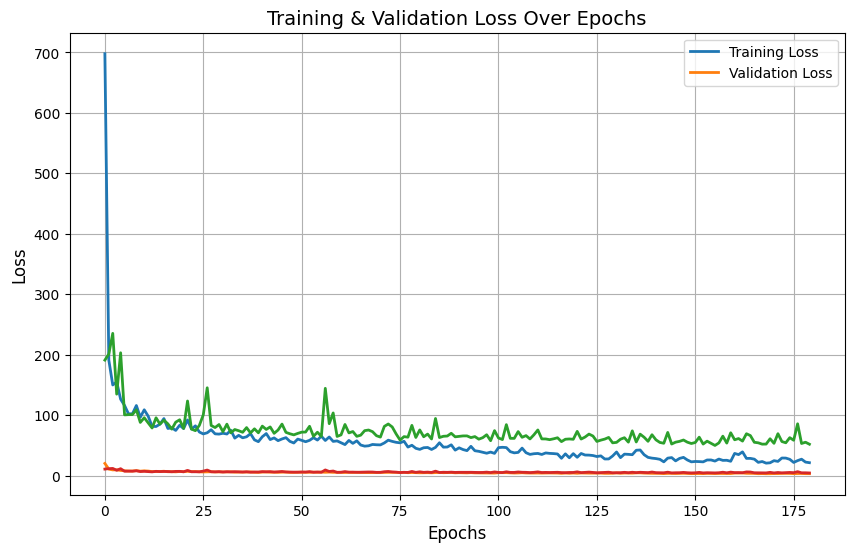

In [ ]:
import matplotlib.pyplot as plt
losses = pd.DataFrame(history.history)
losses.plot(figsize=(10, 6), linewidth=2)
plt.title("Training & Validation Loss Over Epochs", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(["Training Loss", "Validation Loss"])
plt.grid(True)
plt.show()


In [ ]:
# Save the trained model to a file
# model.save("best_ann_model.h5")  # Saves in HDF5 format


In [38]:
from tensorflow.keras.models import load_model

# Load the trained model
model_1 = load_model("best_ann_model.h5")

# Now you can use the model for predictions


In [43]:
import numpy as np

# Example: Predict on new data
  # Replace with actual test data
prediction = model_1.predict(X_test)

print("Predicted Output:", prediction)


10/10 [==============================] - 0s 12ms/step
Predicted Output: [[ 72.552864 ]
 [ 22.87465  ]
 [ 36.191658 ]
 [ 35.378323 ]
 [ 32.526836 ]
 [ 46.6408   ]
 [ 82.51013  ]
 [ 22.716942 ]
 [ 81.98937  ]
 [ 35.167126 ]
 [ 43.217033 ]
 [ 34.271893 ]
 [ 30.427723 ]
 [ 26.437218 ]
 [ 35.86526  ]
 [ 30.778097 ]
 [ 40.105545 ]
 [ 31.58693  ]
 [ 43.180286 ]
 [ 16.399616 ]
 [ 56.518726 ]
 [ 17.814516 ]
 [ 38.70272  ]
 [ 54.06279  ]
 [ 63.776684 ]
 [ 48.803886 ]
 [ 46.33738  ]
 [ 17.6248   ]
 [ 35.69879  ]
 [ 69.00237  ]
 [ 33.084023 ]
 [ 32.451206 ]
 [ 29.715206 ]
 [ 22.65273  ]
 [ 87.17076  ]
 [ 74.116    ]
 [ 34.38308  ]
 [ 24.620007 ]
 [ 48.66907  ]
 [ 31.478823 ]
 [ 34.65585  ]
 [ 36.641624 ]
 [ 54.976017 ]
 [ 49.37434  ]
 [ 53.38919  ]
 [ 36.189106 ]
 [ 47.08826  ]
 [ 51.92429  ]
 [ 52.457237 ]
 [ 49.37043  ]
 [ 62.171745 ]
 [ 57.75173  ]
 [ 22.853428 ]
 [ 23.557737 ]
 [ 17.285063 ]
 [ 45.43987  ]
 [ 44.484444 ]
 [ 37.32486  ]
 [ 85.75708  ]
 [ 23.038315 ]
 [109.85701  ]
 [ 64.89452  

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.863943287451296

In [63]:
import numpy as np
M2 = np.array([[440,.34,726,1046,0,25,0,0]])
F2=np.array([[440,.34,726,1046,25,0,0,0]])

In [64]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
m2_scaled= scaler.transform(M2)
f2_scaled= scaler.transform(F2)


c:\Users\avanish\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\avanish\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
ans=model_1.predict(m2_scaled)
ans2=model_1.predict(f2_scaled)
print(ans)
print(ans2)
print(m2_scaled)
print(f2_scaled)

1/1 [==============================] - 0s 38ms/step
[[76.9075]]
[[68.271935]]
[[ 1.13448535 -1.18156415 -0.35109218  0.59212377 -0.66619158  2.48300496
  -0.31512698 -0.37715377]]
[[ 1.13448535 -1.18156415 -0.35109218  0.59212377 -0.28055065 -0.15736454
  -0.31512698 -0.37715377]]


In [61]:
print(X_test)

[[ 1.32896217 -1.09080279 -0.60983278 ... -0.15736454 -0.31512698
  -0.37715377]
 [-0.26574781  1.61977288 -0.03761335 ... -0.15736454 -0.31512698
  -0.37715377]
 [ 0.71636017 -0.02201351 -0.28437745 ... -0.15736454 -0.31512698
  -0.37715377]
 ...
 [ 1.05474985 -0.27378242  2.31749685 ... -0.15736454 -0.31512698
  -0.37715377]
 [-1.70487634  0.71067264  0.91889899 ... -0.15736454 -0.31512698
  -0.37715377]
 [-1.53957103  1.46186039  1.07403082 ... -0.15736454 -0.31512698
  -0.37715377]]


In [2]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))



Num GPUs Available: 1


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization


In [ ]:
def build_and_train_model(neurons, dropout_rate, learning_rate):
    neurons = int(neurons)  # Convert float to integer
    dropout_rate = float(dropout_rate)  
    learning_rate = float(learning_rate)

    # Define ANN model
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation='relu'),  # Half the neurons in the second layer
        Dropout(dropout_rate),
        Dense(1, activation='linear')  # Regression output layer
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
    # Train model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.2)

    # Evaluate model
    mse, mae = model.evaluate(X_test, y_test, verbose=0)
    
    return -mse  # Bayesian Optimization maximizes the objective, so we return negative MSE


In [ ]:
# Define search space
pbounds = {
    'neurons': (32, 2048),
    'dropout_rate': (0.1, 0.5),
    'learning_rate': (0.0000001, 0.01)
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=build_and_train_model,  # Function to optimize
    pbounds=pbounds, 
    random_state=42, 
    verbose=2
)

# Run optimization
optimizer.maximize(init_points=5, n_iter=10)  # 5 random samples, 10 optimization iterations

# Best parameters
best_params = optimizer.max
print("\nBest Hyperparameters Found:", best_params)


|   iter    |  target   | dropou... | learni... |  neurons  |
-------------------------------------------------------------
| 1         | -102.6    | 0.2498    | 0.009507  | 1.508e+03 |
| 2         | -72.61    | 0.3395    | 0.00156   | 346.5     |
